<a href="https://colab.research.google.com/github/21pravi/Bank-Churn-Prediction-using-Deep-Learning-Models/blob/main/Artificial_Neural_Network_ipynb(Complete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

## Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')


In [ ]:
dataset.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1316,1317,15808689,Morres,850,France,Female,31,4,0.00,2,1,1,33082.81,0
2811,2812,15699550,Babbage,695,Spain,Female,34,9,0.00,2,1,1,67502.12,0
6104,6105,15750731,Trevisani,736,Germany,Male,50,9,116309.01,1,1,0,185360.40,1
7861,7862,15589948,Disher,607,Spain,Male,28,1,135936.10,2,1,1,110560.14,0
4326,4327,15764284,Torres,714,Spain,Male,27,3,0.00,3,1,1,129130.09,0


In [ ]:
dataset.shape


(10000, 14)

###Checking for missing values in any row

In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


###Checking for duplicate rows

In [ ]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print("\nNumber of duplicate rows:")
print(duplicates)



Number of duplicate rows:
0


# Data Cleaning


In [ ]:
dataset.drop('RowNumber' ,axis='columns',inplace=True)

In [ ]:
dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset.drop('CustomerId' ,axis='columns',inplace=True)
dataset.drop('Surname' ,axis='columns',inplace=True)

In [ ]:
dataset.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6195,514,France,Female,41,7,0.00,2,1,1,3756.65,0
4178,510,France,Female,32,1,0.00,2,0,1,28515.17,0
2227,633,Spain,Male,58,6,98308.51,1,1,1,132034.13,0
9493,664,France,Female,36,0,103502.22,1,1,1,146191.82,0
9119,731,Spain,Female,40,5,171325.98,1,1,1,159718.27,1


In [ ]:
Ext_N0 = dataset[dataset.Exited==0].Tenure
Ext_YES = dataset[dataset.Exited==1].Tenure

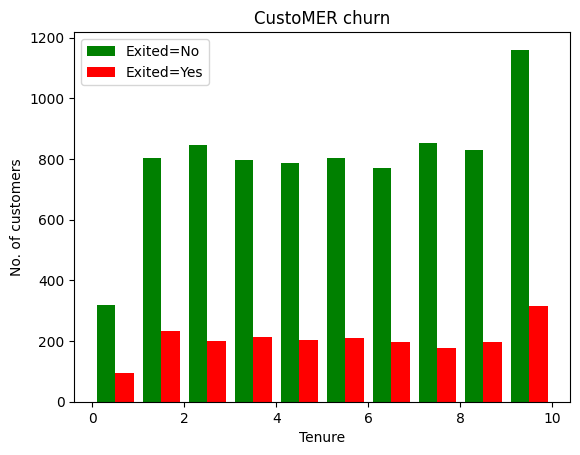

In [ ]:
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title('CustoMER churn')
plt.hist([Ext_N0,Ext_YES], color=['green','red'],label=['Exited=No','Exited=Yes'])
plt.legend()

### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
dataset['Gender'].replace({'Female':1, 'Male':0},inplace=True)

In [ ]:
dataset.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9251,541,France,1,39,6,109844.81,1,1,0,25289.23,0
1219,693,Germany,0,44,5,124601.58,2,1,1,46998.13,1


###Split Data

In [ ]:
#Dependent Var is Y
#Independent Var is X
X = dataset.iloc[:,:-1]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64
9996,516,France,0,35,10,57369.61,1,1,1,101699.77
9997,709,France,1,36,7,0.00,1,0,1,42085.58
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y = dataset.iloc[:,-1]

In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

One Hot Encoding the "Geography" column

In [ ]:
one_hot = pd.get_dummies(dataset['Geography'], drop_first=False).astype(int)


In [ ]:
one_hot

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset=dataset.drop('Geography',axis=1)

In [ ]:
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset = dataset.join(one_hot)

In [ ]:
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64
9996,516,France,0,35,10,57369.61,1,1,1,101699.77
9997,709,France,1,36,7,0.00,1,0,1,42085.58
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

###Spliting the dataset into features (X) and target (Y)

In [ ]:
# Split the dataset into features (X) and target (Y)
X = dataset.drop('Exited', axis=1)
Y = dataset['Exited']

In [ ]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,0,1,0


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

###Checking for Outliers

In [ ]:
from scipy import stats

# List of columns to check for outliers
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# For each column, calculate the z-scores and print the number of outliers
for col in columns:
    z_scores = np.abs(stats.zscore(dataset[col]))
    outliers = z_scores > 3
    print(f"{col} has {outliers.sum()} outliers")

CreditScore has 8 outliers
Age has 133 outliers
Tenure has 0 outliers
Balance has 0 outliers
NumOfProducts has 60 outliers
HasCrCard has 0 outliers
IsActiveMember has 0 outliers
EstimatedSalary has 0 outliers


###Handling Imbalanced Data

In [ ]:
# Calculate the IQR for each feature
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
dataset = dataset[~((dataset < lower_bound) | (dataset > upper_bound))].dropna()

# Print the updated dataset
print(dataset)
print(dataset.head())

      CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
3           699.0       1  39.0       1       0.00            2.0          0   
6           822.0       0  50.0       7       0.00            2.0          1   
8           501.0       0  44.0       4  142051.07            2.0          0   
9           684.0       0  27.0       2  134603.88            1.0          1   
10          528.0       0  31.0       6  102016.72            2.0          0   
...           ...     ...   ...     ...        ...            ...        ...   
9993        644.0       0  28.0       7  155060.41            1.0          1   
9994        800.0       1  29.0       2       0.00            2.0          0   
9995        771.0       0  39.0       5       0.00            2.0          1   
9996        516.0       0  35.0      10   57369.61            1.0          1   
9999        792.0       1  28.0       4  130142.79            1.0          1   

      IsActiveMember  EstimatedSalary  

In [ ]:
from imblearn.combine import SMOTEENN

# Apply SMOTEENN (SMOTE + Edited Nearest Neighbors) to balance the classes
smoteenn = SMOTEENN(sampling_strategy=0.8)  # Adjust the sampling strategy as needed
X_sm, Y_sm = smoteenn.fit_resample(X, Y)


###Checking for Outliers

In [ ]:
from scipy import stats

# List of columns to check for outliers
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# For each column, calculate the z-scores and print the number of outliers
for col in columns:
    z_scores = np.abs(stats.zscore(dataset[col]))
    outliers = z_scores > 3
    print(f"{col} has {outliers.sum()} outliers")

CreditScore has 0 outliers
Age has 68 outliers
Tenure has 0 outliers
Balance has 0 outliers
NumOfProducts has 0 outliers
HasCrCard has 0 outliers
IsActiveMember has 0 outliers
EstimatedSalary has 0 outliers


### Removing Outliers from 'Age' Column Using IQR

In [ ]:
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
from scipy import stats

# List of columns to check for outliers
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# For each column, calculate the z-scores and print the number of outliers
for col in columns:
    z_scores = np.abs(stats.zscore(dataset[col]))
    outliers = z_scores > 3
    print(f"{col} has {outliers.sum()} outliers")

CreditScore has 0 outliers
Age has 68 outliers
Tenure has 0 outliers
Balance has 0 outliers
NumOfProducts has 0 outliers
HasCrCard has 0 outliers
IsActiveMember has 0 outliers
EstimatedSalary has 0 outliers


In [ ]:
# Remove outliers
dataset = dataset[(dataset['Age'] >= lower_bound) & (dataset['Age'] <= upper_bound)]

# Print the updated dataset shape
print(f"Dataset shape after removing outliers: {dataset.shape}")


Dataset shape after removing outliers: (5493, 13)


### Checking for Outliers in 'Age' Column Again

In [ ]:
z_scores = np.abs(stats.zscore(dataset['Age']))
outliers = z_scores > 3
print(f"Age column has {outliers.sum()} outliers after removal")

Age column has 0 outliers after removal


###Checking for data balance



In [ ]:
# Check Class Distribution before Balancing
class_counts = Y.value_counts()
print("Class distribution before balancing:")
print(class_counts)

Class distribution before balancing:
Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
# Check Class Distribution After Balancing
class_counts_sm = Y_sm.value_counts()
print("Class distribution after balancing:")
print(class_counts_sm)

Class distribution after balancing:
Exited
0    3102
1    2400
Name: count, dtype: int64


In [ ]:
ratio_sm = class_counts_sm[1] / class_counts_sm[0]
print(f"Ratio of class 1 to class 0 after balancing: {ratio_sm:.2f}")

Ratio of class 1 to class 0 after balancing: 0.77


### Splitting the dataset into Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_sm_train, X_sm_test, Y_sm_train, Y_sm_test = train_test_split(X_sm, Y_sm, test_size = 0.2, random_state = 0)

In [ ]:
X_sm_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
2399,734,0,43,7,107805.670000,1,0,0,182505.680000,1,0,0
2731,824,1,38,3,0.000000,2,1,0,192800.250000,0,0,1
1390,850,0,41,1,176958.460000,2,0,1,125806.300000,0,1,0
4869,715,0,38,6,123398.890169,2,0,1,56994.698535,0,0,0
507,541,0,37,9,118636.920000,1,1,1,73551.440000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4931,666,0,42,7,142477.071217,1,1,1,115876.635719,0,0,0
3264,537,1,46,5,100727.500000,1,0,1,140857.760000,0,1,0
1653,648,0,44,9,111369.790000,2,1,1,91947.740000,0,1,0
2607,498,0,35,2,121968.110000,2,0,1,188343.050000,0,1,0


In [ ]:
X_sm_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
3629,659,0,60,2,0.000000,1,1,0,177480.450000,0,0,1
142,622,1,32,6,169089.380000,2,1,0,101057.950000,1,0,0
1367,812,0,24,10,0.000000,2,1,1,156906.150000,1,0,0
4646,710,0,45,3,96931.231891,1,0,0,133176.431658,0,0,0
3568,655,0,34,7,118028.350000,1,1,0,51226.320000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3074,706,1,56,3,139603.220000,1,1,1,86383.610000,0,1,0
4612,591,0,42,3,0.000000,1,1,0,85267.264812,0,0,0
3669,443,1,35,9,108308.000000,1,1,0,129031.190000,1,0,0
5135,705,0,39,5,74733.870169,1,1,1,9789.563612,0,0,0


###Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create a scaler object
scaler = RobustScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_sm_train)
X_test_scaled = scaler.transform(X_sm_test)

### Using Grid Search algorithm to find the best parameters to build our ANN model

In [ ]:
# Function to create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model():
    ann = Sequential()
    ann.add(Dense(units=64, activation='relu',))
    ann.add(Dense(units=32, activation='relu',))
    ann.add(Dense(units=12, activation='relu'))
    ann.add(Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
# Custom KerasClassifier class
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, create_model_fn, batch_size=32, epochs=100):
        self.create_model_fn = create_model_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X_train_scaled, Y_sm_train):
        self.model = self.create_model_fn()
        self.model.fit(X_train_scaled, Y_sm_train, batch_size=self.batch_size, epochs=self.epochs)
        return self

    def predict(self, X_train_scaled):
        return (self.model.predict(X_train_scaled) > 0.5).astype(int)

In [ ]:
# Create a KerasClassifier
model = KerasClassifier(create_model)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Define the grid search parameters
param_grid = {
    'batch_size': [6, 12, 32, 64],
    'epochs': [50, 100, 150, 200]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid_search.fit(X_train_scaled, Y_sm_train)

# Print the best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)


Streaming output truncated to the last 5000 lines.
Epoch 111/150
266/266 [==============================] - 1s 4ms/step - loss: 0.1794 - accuracy: 0.9288
Epoch 112/150
266/266 [==============================] - 1s 4ms/step - loss: 0.1797 - accuracy: 0.9272
Epoch 113/150
266/266 [==============================] - 1s 4ms/step - loss: 0.1793 - accuracy: 0.9283
Epoch 114/150
266/266 [==============================] - 1s 4ms/step - loss: 0.1806 - accuracy: 0.9288
Epoch 115/150
266/266 [==============================] - 1s 4ms/step - loss: 0.1746 - accuracy: 0.9298
Epoch 116/150
266/266 [==============================] - 1s 4ms/step - loss: 0.1772 - accuracy: 0.9289
Epoch 117/150
266/266 [==============================] - 1s 3ms/step - loss: 0.1731 - accuracy: 0.9304
Epoch 118/150
266/266 [==============================] - 1s 3ms/step - loss: 0.1736 - accuracy: 0.9318
Epoch 119/150
266/266 [==============================] - 1s 3ms/step - loss: 0.1723 - accuracy: 0.9311
Epoch 120/150
266/266 

###Building the ANN model with best parameters

In [ ]:
# Build the ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history=ann.fit(X_train_scaled, Y_sm_train, batch_size=64, epochs=50)

Epoch 1/50
69/69 [==============================] - 1s 2ms/step - loss: 0.5397 - accuracy: 0.7328
Epoch 2/50
69/69 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8094
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8350
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8480
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8550
Epoch 6/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8587
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8678
Epoch 8/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8668
Epoch 9/50
69/69 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8737
Epoch 10/50
69/69 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8737
Epoch 11/50
69/69 [

### Making predictions from the model

In [ ]:
Y_pred = ann.predict(X_test_scaled)
Y_pred = (Y_pred > 0.5)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), np.array(Y_sm_test).reshape(len(Y_sm_test),1)),1))

35/35 [==============================] - 0s 1ms/step
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [0 0]]


In [ ]:
print(Y_pred)

[[ True]
 [False]
 [False]
 ...
 [False]
 [ True]
 [False]]


##Predicting the result of a single observation



Using our ANN model to predict if the customer with the following informations will leave the bank:

    1.Geography: France
    2.Credit Score: 600
    3.Gender: Male
    4.Age: 40 years old
    5.Tenure: 3 years
    6.Balance: $ 60000
    7.Number of Products: 2
    8.Does this customer have a credit card? Yes
    9.Is this customer an Active Member: Yes
    10.Estimated Salary: $ 50000




In [ ]:
import pandas as pd

# Assuming 'scaler' is your RobustScaler and 'features' is a list of feature names
features = [ 'CreditScore',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard', 'IsActiveMember',	'EstimatedSalary', 'France',	'Germany',	'Spain',	]

# Create a DataFrame with the correct feature names

X = pd.DataFrame([[ 600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]], columns=features)
# Use the scaler to transform the data
X_test_scaled = scaler.transform(X)

# Use the ANN to predict the transformed data
print(ann.predict(X_test_scaled) )

1/1 [==============================] - 0s 22ms/step
[[0.1521365]]


###Evaluating the model using various metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision
precision = precision_score(Y_sm_test, Y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(Y_sm_test, Y_pred)
print("Recall:", recall)

# Calculate accuracy
accuracy = accuracy_score(Y_sm_test, Y_pred)
print("Accuracy:", accuracy)

Precision: 0.8252631578947368
Recall: 0.814968814968815
Accuracy: 0.8437783832879201


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_sm_test, Y_pred)
print("F1 Score:", f1)

F1 Score: 0.8200836820083681


### Making the Confusion Matrix and Heatmap

[[537  83]
 [ 89 392]]


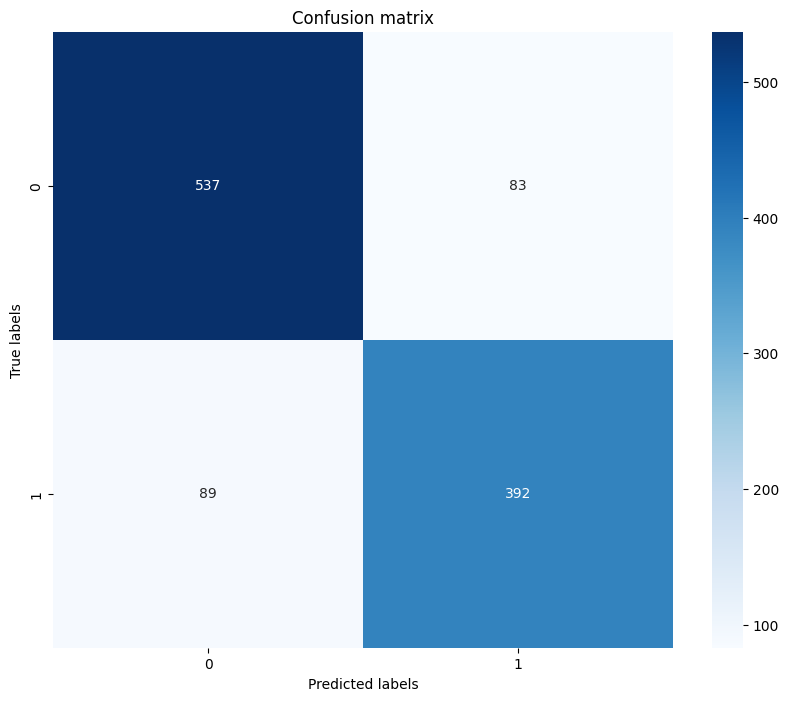

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(Y_sm_test, Y_pred)
print(cm)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

###Heatmap for accuracy,precision, recall, f1 score


[[537  83]
 [ 89 392]]


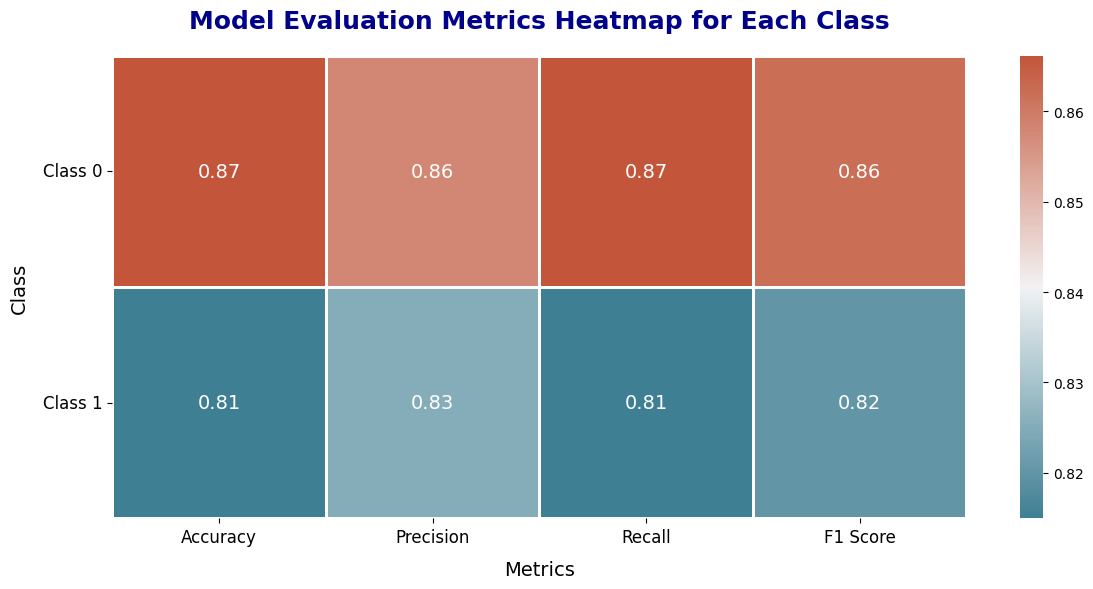

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(Y_sm_test, Y_pred)
print(cm)

# Calculate metrics for each class
accuracy_0 = cm[0, 0] / (cm[0, 0] + cm[0, 1])
accuracy_1 = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision_0 = precision_score(Y_sm_test, Y_pred, pos_label=0)
precision_1 = precision_score(Y_sm_test, Y_pred, pos_label=1)
recall_0 = recall_score(Y_sm_test, Y_pred, pos_label=0)
recall_1 = recall_score(Y_sm_test, Y_pred, pos_label=1)
f1_0 = f1_score(Y_sm_test, Y_pred, pos_label=0)
f1_1 = f1_score(Y_sm_test, Y_pred, pos_label=1)

# Create a dictionary with the metrics
metrics = {
    'Accuracy': [accuracy_0, accuracy_1],
    'Precision': [precision_0, precision_1],
    'Recall': [recall_0, recall_1],
    'F1 Score': [f1_0, f1_1]
}

# Convert the dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=['Class 0', 'Class 1'])

# Set up the figure
plt.figure(figsize=(12, 6))

# Define a color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap
sns.heatmap(metrics_df, annot=True, cmap=cmap, cbar=True, fmt='.2f', annot_kws={"size": 14}, linewidths=2, linecolor='white')

# Customize the aesthetics
plt.title('Model Evaluation Metrics Heatmap for Each Class', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Metrics', fontsize=14, labelpad=10)
plt.ylabel('Class', fontsize=14, labelpad=10)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)

# Show the heatmap
plt.tight_layout()
plt.show()


###Loss vs Accuracy

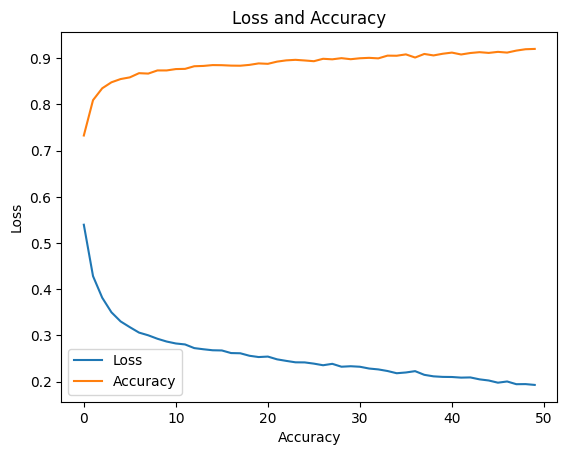

In [ ]:

# Plotting Loss and accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Loss and Accuracy')
plt.ylabel('Loss')
plt.xlabel('Accuracy')
plt.legend()
plt.show()
